In [1]:
import numpy as np                                                                                                                 
import math
import pandas as pd 
import numpy as np 
import xlrd

loc_y=('Velocity_PSM_X_temp.xlsx')  
print(loc_y)
wb = xlrd.open_workbook(loc_y)

sheet = wb.sheet_by_index(0)

#for i in range(1,sheet.ncols): 
#	print(sheet.cell_value(0, i)) 

x = sheet.cell_value(0,sheet.ncols-1)
vel_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

for i in range(1,sheet.ncols): 
    x = (sheet.cell_value(0, i)) 
    ag=x.split('(')[1].split(')')[0].split('x') 
    vel=float(sheet.cell_value(1, i)) 
    vel_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = vel 

#creating zones:
vel_max = vel_mesh.max()
vel_min = vel_mesh.min()

print('Vel_max = '+str(vel_max))
print('Vel_min = '+str(vel_min))
print('Vel_max-Vel_min = '+str(abs(vel_max-vel_min)))

# zoning

zone = []
for i in range(len(vel_mesh.flatten())):
    if vel_mesh.flatten()[i] == 0:
        zone.append(0)
    if vel_mesh.flatten()[i] > 0:
        zone.append(1)
    if vel_mesh.flatten()[i] < 0:
        zone.append(-1)
        
zone_3d = np.asarray(zone).reshape((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

Velocity_PSM_X_temp.xlsx
Vel_max = 0.341695069346771
Vel_min = -0.17920179834552
Vel_max-Vel_min = 0.520896867692291


In [2]:
loc_filled=('NumParticles_temp1.xlsx')  
print(loc_filled)
wb = xlrd.open_workbook(loc_filled)

sheet = wb.sheet_by_index(0)

#for i in range(1,sheet.ncols): 
#	print(sheet.cell_value(0, i)) 

x = sheet.cell_value(0,sheet.ncols-1)
num_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))
filled_mesh = np.zeros((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))

for i in range(1,sheet.ncols): 
    x = (sheet.cell_value(0, i)) 
    ag=x.split('(')[1].split(')')[0].split('x') 
    num=float(sheet.cell_value(1, i)) 
    num_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = num
    if num > 0:
        filled_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = 1
    else:
        filled_mesh[int(ag[0])-1][int(ag[1])-1][int(ag[2])-1] = 0

NumParticles_temp1.xlsx


In [3]:
zone_filled_3d = np.ones((int(x.split('(')[1].split(')')[0].split('x')[0]),int(x.split('(')[1].split(')')[0].split('x')[1]),int(x.split('(')[1].split(')')[0].split('x')[2])))
zone_filled_3d = np.array(zone_filled_3d)*(-2)

for x in range(10):
    for i in range(20):
        for j in range(20):
            if filled_mesh[x][i][j] == 1:
                zone_filled_3d[x][i][j] = zone_3d[x][i][j]

In [4]:
V_filled = np.zeros(10)

for x in range(10):
    V_filled[x] = len(np.where(filled_mesh[x] == 1)[0])
print(V_filled)

[102.  96.  96.  95.  98.  88.  87.  78.  82.  86.]


Contour plot of zones_velocity of X:


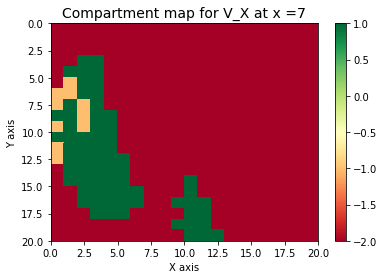

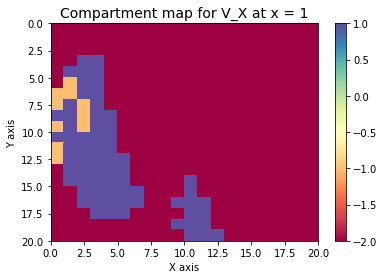

In [5]:
import matplotlib as mpl
import matplotlib.colors as colors
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Figures at X location identified by zloc
zloc = 7
#Contour plot of zones_velocity of Y:
X = np.arange(0,21)
Y = np.arange(0,21)
Z = zone_filled_3d[zloc]
import matplotlib.pyplot as plt 
print('Contour plot of zones_velocity of X:')

plt.figure()
pcm = plt.pcolormesh(X, Y, Z,cmap='RdYlGn', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
#pcm = plt.pcolormesh(X, Y, Z,cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
plt.gca().invert_yaxis()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Compartment map for V_X at x ='+str(zloc), fontsize = 14)
plt.colorbar()
plt.show()


plt.figure()
pcm = plt.pcolormesh(X, Y, zone_filled_3d[zloc],cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
#pcm = plt.pcolormesh(X, Y, Z,cmap='Spectral', shading='auto', vmin=np.min(Z), vmax = np.max(Z))
plt.gca().invert_yaxis()
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Compartment map for V_X at x = 1', fontsize = 14)
plt.colorbar()
plt.show()


In [16]:
# This function gives you the area of zones using collections counter.

import collections
print(collections.Counter(zone_filled_3d[1].flatten()))

print(collections.Counter(zone_filled_3d[1].flatten())[-1.0])

Counter({-2.0: 304, 1.0: 50, -1.0: 46})
46


In [6]:
def return_area(xloc, grid, value):
    return(np.count_nonzero(grid[xloc].flatten() == value))

Values = [-2.0, -1.0, 0, 1.0]
print(return_area(1,zone_filled_3d, -1.0))

46


In [7]:
def return_averaged_vel(xloc, grid, value):
    boundary = np.where(grid[xloc] == value)
    x = boundary[0]
    y = boundary[1]
    if len(x) == 0:
        return(0)
    else:
        #print(vel_mesh[xloc][x,y])
        return(np.average(vel_mesh[xloc][x,y]))
        

def summed_vel(xloc, grid, value):
    boundary = np.where(grid[xloc] == value)
    x = boundary[0]
    y = boundary[1]
    if len(x) == 0:
        return(0)
    else:
        #print(vel_mesh[xloc][x,y])
        return(np.sum(vel_mesh[xloc][x,y]))

xval = 7
print(summed_vel(xval, zone_filled_3d, -1.0))
print(summed_vel(xval, zone_filled_3d, 1.0))
print(return_averaged_vel(xval, zone_filled_3d, -1.0))
print(return_averaged_vel(xval, zone_filled_3d, 1.0))
print(return_averaged_vel(xval, zone_filled_3d, -1.0)*return_area(xval, zone_filled_3d, -1.0))
print(return_averaged_vel(xval, zone_filled_3d, 1.0)*return_area(xval, zone_filled_3d, 1.0))

-0.005082050947365406
4.915528954093643
-0.0005082050947365406
0.07228719050137711
-0.005082050947365406
4.915528954093643


In [19]:
for i in xloc:
    print(return_averaged_vel(i, zone_filled_3d, 1.0))

0.11192021511763281
0.09792723718498292
0.063206443233066
0.04827127363592244
0.050464086415401774
0.060281576262182966
0.08078883066005263
0.07228719050137711
0.0891467087269164
0.09425664838163662


In [9]:
# Evaluate flowrates using averaged_velocity and area:
# flowrates are defined to go from 0 to 1.
# V_x direction is from 0 to 1.
# hence, flowrate at 0 == flowrate between 0 and 1.

xloc = np.arange(0, 10)
Gridval = [-1.0,1.0]
# -2.0 and 0 not included as flowrates = 0 (velocity = 0)
Flowrate_positive = []
Flowrate_negative = []

for i in xloc:
    print(return_averaged_vel(i, zone_filled_3d, 1.0)*return_area(i,zone_filled_3d, 1.0))
    Flowrate_positive.append(return_averaged_vel(i, zone_filled_3d, 1.0)*return_area(i,zone_filled_3d, 1.0))
    print(return_averaged_vel(i, zone_filled_3d, -1.0)*return_area(i,zone_filled_3d, -1.0))
    Flowrate_negative.append(return_averaged_vel(i, zone_filled_3d, -1.0)*return_area(i,zone_filled_3d, -1.0))
print(Flowrate_negative, Flowrate_positive)

2.29154078018711
-0.7357102266978777
1.144424184421672
-0.24177348749647087
1.5575389138189386
-0.07127031874281956
1.630404646497282
-0.006474862154019122
1.8114068872697386
-0.021235744564098064
3.41144094424923
-0.005800451470107916
4.388799759076757
-0.014566108781539746
4.030650066345806
-0.004610635125331181
3.9145124305372647
-0.023269260810476405
2.0096244054197383
-0.7717791370467392
[-0.7357102266978777, -0.24177348749647087, -0.07127031874281956, -0.006474862154019122, -0.021235744564098064, -0.005800451470107916, -0.014566108781539746, -0.004610635125331181, -0.023269260810476405, -0.7717791370467392] [2.29154078018711, 1.144424184421672, 1.5575389138189386, 1.630404646497282, 1.8114068872697386, 3.41144094424923, 4.388799759076757, 4.030650066345806, 3.9145124305372647, 2.0096244054197383]


[-0.7363881562193858, -0.2418746606320469, -0.07127031874281956, -0.5914200358099602, -1.1709251056839536, -0.18480670293104018, -0.03733201151913201, -0.005082050947365406, -0.023269260810476405, -0.7717791370467392] [5.819851186116906, 4.896361859249146, 4.550863912780752, 3.813430617237873, 3.633414221908928, 4.1594287620906245, 5.251273992903421, 4.915528954093643, 5.705389358522649, 4.712832419081831]


In [22]:
print(sum(Flowrate_negative), sum(Flowrate_positive))

-3.8341474403429188 47.458375283985774


In [23]:
import xlsxwriter

workbook = xlsxwriter.Workbook('axialwork.xlsx')
worksheet = workbook.add_worksheet('axial')

worksheet.write('A1', 'flowrate_forward')
row = 0
col = 0
for i in Flowrate_positive:
    worksheet.write(row + 1, col, i)
    row = row + 1
    
worksheet.write('B1', 'flowrate_back')
row = 0
col = 1
for i in Flowrate_negative:
    worksheet.write(row + 1, col, i)
    row = row + 1
    
worksheet.write('C1', 'V_filled')
row = 0
col = 2
for i in V_filled:
    worksheet.write(row + 1, col, i)
    row = row + 1
    
workbook.close()